# 図 3.5 の生成（アルゴリズム 3.6）

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.optim
import torch.nn

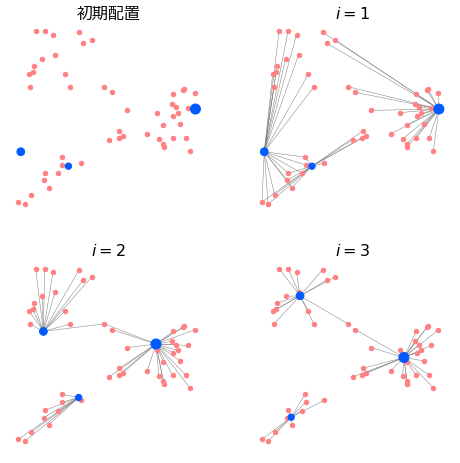

In [2]:
# データの生成
torch.manual_seed(0)
x = torch.rand(10, 2)
y = torch.rand(15, 2) + torch.FloatTensor([0, 2])
z = torch.rand(25, 2) + torch.FloatTensor([1, 1])
a = torch.cat([x, y, z])
b = torch.rand(3, 2) * 2
n = len(a)
m = len(b)
ratio = torch.FloatTensor([0.5, 0.2, 0.3])

# 初期配置の描画
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(2, 2, 1)
for direction in ['left', 'right', 'top', 'bottom']:
    ax.spines[direction].set_visible(False)
ax.scatter(a[:, 0], a[:, 1], c='#ff8082', s=20)
ax.scatter(b.data[:, 0], b.data[:, 1], c='#005aff', s=ratio.detach().numpy() * 200)
ax.set_xlim(-0.1, 2.1)
ax.set_ylim(-0.1, 3.1)
ax.set_xticks([])
ax.set_yticks([])
ax.text(1.0, 3.14, '初期配置', fontfamily='Meiryo', fontsize=16, ha='center')


# アルゴリズム 3.6
for it in range(3):
    eps = 0.1
    D = torch.linalg.norm(a.reshape(n, 1, 2) - b.reshape(1, m, 2), axis=2) ** 2
    K = torch.exp(- D / eps) # ギブスカーネルの計算

    # シンクホーンアルゴリズム（アルゴリズム 3.2）
    u = torch.ones(n) # すべて 1 で初期化
    while True:
        v = ratio / (K.T @ u)
        u = torch.ones(n) / n / (K @ v)

        P = u.reshape(n, 1) * K * v.reshape(1, m)
        
        # 停止条件（参考: 定理 3.10）
        if torch.abs(P.sum(1) - 1/n).sum() < 1e-6 and torch.abs(P.sum(0) - ratio).sum() < 1e-6:
            break

    # 描画
    ax = fig.add_subplot(2, 2, it + 2)
    for direction in ['left', 'right', 'top', 'bottom']:
        ax.spines[direction].set_visible(False)
    ax.scatter(a[:, 0], a[:, 1], c='#ff8082', s=20)
    ax.scatter(b.data[:, 0], b.data[:, 1], c='#005aff', s=ratio.detach().numpy() * 200)
    ax.set_xlim(-0.1, 2.1)
    ax.set_ylim(-0.1, 3.1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(1.0, 3.14, '$i = {}$'.format(it+1), fontfamily='Segoe UI', fontsize=16, ha='center')
    for i in range(n):
        for j in range(m):
            if P[i, j] >= 0.2 / n:
                ax.plot([a.detach().numpy()[i, 0], b.detach().numpy()[j, 0]], [a.detach().numpy()[i, 1], b.detach().numpy()[j, 1]], c='grey', zorder=-1, lw=0.5)

    b = (P.T @ a) / ratio.reshape(-1, 1)